## Installation

Installing Bio, transformers, genomic-benchmarks, and datasets packages.  The Bio package is from Biopython; transformers package for machine learning (pytorch, tensorflow); genomic-benchmarks and datasets from ML-Bioinfo-CEITEC.


In [ ]:
# already set up on Expanse; toggle for colab

# pip install -qq Bio transformers genomic-benchmarks datasets transformers[torch] pyfaidx

Set path prefix for Expanse

In [1]:
path_prefix = "/expanse/lustre/projects/nji102/sgriesmer/"

Import SNP datasets

In [2]:
import pandas as pd

abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/SNP_PRVCS_CAN_0_5023-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')
abs_diff_plus_log_odds_scores_norm.head(), abs_diff_plus_log_odds_scores_norm.shape


(   BroadDnd41CtcfUniPk151-ran  BroadDnd41Ezh239875UniPk151-ran  \
 0                    0.306653                        -0.556821   
 1                   -0.111710                        -0.113748   
 2                    0.090462                        -0.502083   
 3                   -0.143991                        -0.349744   
 4                   -0.144492                        -0.409669   
 
    BroadGm12878CtcfUniPk151-ran  BroadGm12878Ezh239875UniPk151-ran  \
 0                      0.018333                          -0.521790   
 1                      0.118644                           1.831607   
 2                     -0.059683                          -0.682626   
 3                     -0.189783                          -0.485974   
 4                     -0.191357                           0.003039   
 
    BroadH1hescChd1a301218aUniPk151-ran  BroadH1hescCtcfUniPk151-ran  \
 0                            -0.397740                     0.304906   
 1                      

Choose test set for run

In [3]:
import xgboost

/cm/shared/apps/spack/0.17.3/cpu/b/opt/spack/linux-rocky8-zen/gcc-8.5.0/anaconda3-2021.05-q4munrgvh7qp4o7r3nzcdkbuph4z7375/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [5]:
X=abs_diff_plus_log_odds_scores_norm[0:5023]

In [6]:
X

,BroadDnd41CtcfUniPk151-ran,BroadDnd41Ezh239875UniPk151-ran,BroadGm12878CtcfUniPk151-ran,BroadGm12878Ezh239875UniPk151-ran,BroadH1hescChd1a301218aUniPk151-ran,BroadH1hescCtcfUniPk151-ran,BroadH1hescEzh239875UniPk151-ran,BroadH1hescJarid1aab26049UniPk151-ran,BroadH1hescRbbp5a300109aUniPk151-ran,BroadHelas3CtcfUniPk151-ran,...,UwMcf7CtcfUniPk151-ran.1,UwNb4CtcfUniPk151-ran.1,UwNhdfneoCtcfUniPk151-ran.1,UwNhekCtcfUniPk151-ran.1,UwNhlfCtcfUniPk151-ran.1,UwRptecCtcfUniPk151-ran.1,UwSaecCtcfUniPk151-ran.1,UwSknshraCtcfUniPk151-ran.1,UwWerirb1CtcfUniPk151-ran.1,UwWi38CtcfUniPk151-ran.1
0,0.306653,-0.556821,0.018333,-0.521790,-0.397740,0.304906,-0.250733,-0.502371,-0.331445,0.104589,...,0.161162,2.493501,0.508397,0.315912,0.458727,0.510215,-0.314536,0.241683,0.519838,1.156624
1,-0.111710,-0.113748,0.118644,1.831607,-0.396543,-0.122070,-0.250106,-0.450897,-0.332165,4.180299,...,0.127964,1.306674,-0.299451,0.140796,1.378727,-0.102556,-0.500327,0.202275,0.561808,0.526119
2,0.090462,-0.502083,-0.059683,-0.682626,-0.397647,-0.163870,-0.250740,-0.502466,-0.332611,-0.136593,...,-0.257329,-0.208183,-0.278110,-0.138206,-0.198377,-0.124777,-0.306719,0.043669,-0.174972,-0.154073
3,-0.143991,-0.349744,-0.189783,-0.485974,-0.391880,-0.164242,-0.250665,-0.300571,-0.328237,-0.139470,...,1.188030,1.033966,-0.058070,-0.055008,0.305962,-0.300284,0.023444,-0.226416,-0.159670,3.054452
4,-0.144492,-0.409669,-0.191357,0.003039,-0.373176,-0.164270,-0.250392,-0.486401,-0.285498,-0.156234,...,-0.310854,-0.153070,-0.169165,-0.305359,-0.268203,-0.142192,-0.343744,-0.228562,-0.197016,-0.247948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,-0.138860,-0.543929,-0.073434,-0.687548,-0.397524,-0.155174,-0.250739,-0.495441,-0.332608,-0.130375,...,3.978750,0.303906,0.092633,0.585478,0.257663,0.429276,0.494833,4.729899,4.630994,-0.338688
5019,4.783827,1.997961,0.333336,1.850811,6.342943,2.034023,-0.247243,5.612971,-0.324075,3.024356,...,-0.300507,4.943333,2.558837,2.642982,1.639358,1.499459,1.607354,2.046898,1.752810,3.238786
5020,-0.140555,-0.553483,-0.152443,0.561306,0.647902,0.057787,-0.250562,0.076153,-0.331908,-0.037337,...,-0.199389,0.039086,-0.373643,0.314501,-0.158225,0.533938,-0.514059,-0.218508,0.153822,0.420841
5021,-0.143869,0.203208,-0.176924,1.938559,0.238020,-0.164218,-0.167718,-0.086010,0.060280,-0.152157,...,-0.274437,-0.208020,-0.395044,-0.216634,-0.241317,-0.117355,-0.343776,-0.205415,0.074402,-0.248003


In [7]:
col_lab = list(range(0,1380))
X = X.set_axis(col_lab, axis="columns")

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
0,0.306653,-0.556821,0.018333,-0.521790,-0.397740,0.304906,-0.250733,-0.502371,-0.331445,0.104589,...,0.161162,2.493501,0.508397,0.315912,0.458727,0.510215,-0.314536,0.241683,0.519838,1.156624
1,-0.111710,-0.113748,0.118644,1.831607,-0.396543,-0.122070,-0.250106,-0.450897,-0.332165,4.180299,...,0.127964,1.306674,-0.299451,0.140796,1.378727,-0.102556,-0.500327,0.202275,0.561808,0.526119
2,0.090462,-0.502083,-0.059683,-0.682626,-0.397647,-0.163870,-0.250740,-0.502466,-0.332611,-0.136593,...,-0.257329,-0.208183,-0.278110,-0.138206,-0.198377,-0.124777,-0.306719,0.043669,-0.174972,-0.154073
3,-0.143991,-0.349744,-0.189783,-0.485974,-0.391880,-0.164242,-0.250665,-0.300571,-0.328237,-0.139470,...,1.188030,1.033966,-0.058070,-0.055008,0.305962,-0.300284,0.023444,-0.226416,-0.159670,3.054452
4,-0.144492,-0.409669,-0.191357,0.003039,-0.373176,-0.164270,-0.250392,-0.486401,-0.285498,-0.156234,...,-0.310854,-0.153070,-0.169165,-0.305359,-0.268203,-0.142192,-0.343744,-0.228562,-0.197016,-0.247948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,-0.138860,-0.543929,-0.073434,-0.687548,-0.397524,-0.155174,-0.250739,-0.495441,-0.332608,-0.130375,...,3.978750,0.303906,0.092633,0.585478,0.257663,0.429276,0.494833,4.729899,4.630994,-0.338688
5019,4.783827,1.997961,0.333336,1.850811,6.342943,2.034023,-0.247243,5.612971,-0.324075,3.024356,...,-0.300507,4.943333,2.558837,2.642982,1.639358,1.499459,1.607354,2.046898,1.752810,3.238786
5020,-0.140555,-0.553483,-0.152443,0.561306,0.647902,0.057787,-0.250562,0.076153,-0.331908,-0.037337,...,-0.199389,0.039086,-0.373643,0.314501,-0.158225,0.533938,-0.514059,-0.218508,0.153822,0.420841
5021,-0.143869,0.203208,-0.176924,1.938559,0.238020,-0.164218,-0.167718,-0.086010,0.060280,-0.152157,...,-0.274437,-0.208020,-0.395044,-0.216634,-0.241317,-0.117355,-0.343776,-0.205415,0.074402,-0.248003


In [9]:
import pandas as pd

snp_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/CAN_dataset_XY-named.csv", sep=',')


In [10]:
y = snp_prvcs['label'][0:5023]

In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5018    1
5019    1
5020    1
5021    1
5022    1
Name: label, Length: 5023, dtype: int64

In [12]:
y[2500:2510]

2500    0
2501    0
2502    0
2503    0
2504    0
2505    0
2506    1
2507    1
2508    1
2509    1
Name: label, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
test_size = 0.3
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

Try logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_train_model = lr_model.fit(X_train,y_train)
pred_lr = lr_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

print("Accuracy_model_lr: %.4f" % (accuracy_score(y_test, pred_lr))) 
print("F1_model_lr: %.4f" % (f1_score(y_test, pred_lr)))
print("MCC_model_lr: %.4f" % (matthews_corrcoef(y_test, pred_lr)))
print("ROC_AUC_model_lr: %.4f" % (roc_auc_score(y_test, pred_lr))) # don't know about call: y_score vs. pred

Accuracy_model_lr: 0.6111
F1_model_lr: 0.6214
MCC_model_lr: 0.2218
ROC_AUC_model_lr: 0.6110


In [16]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_val, pred1)
tn, fp, fn, tp = confusion_matrix(y_test, pred_lr).ravel()
print(tp, fp, fn, tn)

481 286 300 440


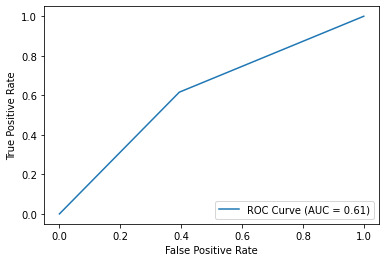

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_lr)
roc_auc = roc_auc_score(y_test, pred_lr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [18]:
# Save logistic regression model

from joblib import dump, load

best_estimator = lr_train_model
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_CAN_lr.joblib")

['/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_CAN_lr.joblib']

In [18]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

model1 = XGBClassifier() 
model2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5) 
train_model1 = model1.fit(X_train, y_train) 
train_model2 = model2.fit(X_train, y_train) 
pred1 = train_model1.predict(X_test) 
pred2 = train_model2.predict(X_test) 
print("Accuracy_model1: %.4f" % (accuracy_score(y_test, pred1))) 
print("Accuracy_model2: %.4f" % (accuracy_score(y_test, pred2))) 
print("F1_model1: %.4f" % (f1_score(y_test, pred1)))
print("F1_model2: %.4f" % (f1_score(y_test, pred2)))
print("MCC_model1: %.4f" % (matthews_corrcoef(y_test, pred1)))
print("MCC_model2: %.4f" % (matthews_corrcoef(y_test, pred2)))
print("ROC_AUC_model1: %.4f" % (roc_auc_score(y_test, pred1))) # don't know about call: y_score vs. pred
print("ROC_AUC_model2: %.4f" % (roc_auc_score(y_test, pred2))) # don't know about call: y_score vs. pred


Accuracy_model1: 0.7094
Accuracy_model2: 0.7027
F1_model1: 0.7004
F1_model2: 0.6902
MCC_model1: 0.4245
MCC_model2: 0.4129
ROC_AUC_model1: 0.7114
ROC_AUC_model2: 0.7051


In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, pred1).ravel()
print(tp, fp, fn, tn)

512 169 269 557


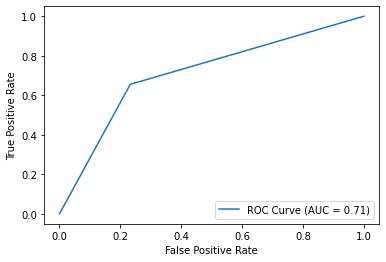

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred1)
roc_auc = roc_auc_score(y_test, pred1)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, pred2).ravel()
print(tp, fp, fn, tn)

499 166 282 560


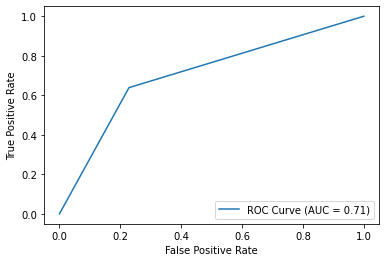

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred2)
roc_auc = roc_auc_score(y_test, pred2)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [24]:
model3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=7)

train_model3 = model3.fit(X_train, y_train)
pred3 = train_model3.predict(X_test)
print("Accuracy_model3: %.4f" % (accuracy_score(y_test, pred3)))
print("F1_model3: %.4f" % (f1_score(y_test, pred3)))
print("MCC_model3: %.4f" % (matthews_corrcoef(y_test, pred3)))
print("ROC_AUC_model3: %.4f" % (roc_auc_score(y_test, pred3))) # don't know about call: y_score vs. pred

Accuracy_model3: 0.7113
F1_model3: 0.7023
MCC_model3: 0.4286
ROC_AUC_model3: 0.7134


In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, pred3).ravel()
print(tp, fp, fn, tn)

513 167 268 559


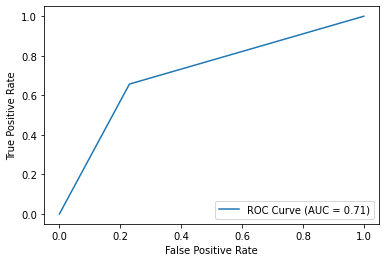

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred3)
roc_auc = roc_auc_score(y_test, pred3)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [27]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':[10],
 'min_child_weight':[1],
 'learning_rate':[0.1],
 'n_estimators':[1000],
 'objective':['binary:logistic']
 #'objective':['binary:logistic','binary:hinge','binary:logitraw']
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(gamma=0, 
                                               subsample=0.8, 
                                               colsample_bytree=0.8, 
                                               nthread=4, 
                                               scale_pos_weight=1, 
                                               seed=7), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=5,
                       refit=True)

train_model4 = gsearch.fit(X_train, y_train)
pred4 = train_model4.predict(X_test)
print("Accuracy_model4: %.4f" % (accuracy_score(y_test, pred4)))  
print("F1_model4: %.4f" % (f1_score(y_test, pred4)))  
print("MCC_model4: %.4f" % (matthews_corrcoef(y_test, pred4)))  
print("ROC_AUC_model4: %.4f" % (roc_auc_score(y_test, pred4)))  

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy_model4: 0.7153
F1_model4: 0.7043
MCC_model4: 0.4377
ROC_AUC_model4: 0.7176


In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, pred4).ravel()
print(tp, fp, fn, tn)

511 159 270 567


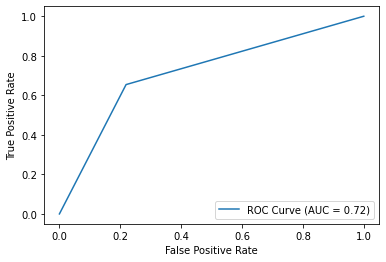

In [29]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred4)
roc_auc = roc_auc_score(y_test, pred4)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [30]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'objective': 'binary:logistic'}

In [31]:
model_deepsea1 = XGBClassifier(
 reg_alpha = 20,
 reg_lambda = 2000,
 eta = 0.1,
 n_estimators=10,
 objective= 'binary:logistic',
 seed=7)

train_model_deepsea1 = model_deepsea1.fit(X_train, y_train)
pred_deepsea1 = train_model_deepsea1.predict(X_test)
print("Accuracy_model_deepsea1: %.4f" % (accuracy_score(y_test, pred_deepsea1)))
print("F1_model_deepsea1: %.4f" % (f1_score(y_test, pred_deepsea1)))
print("MCC_model_deepsea1: %.4f" % (matthews_corrcoef(y_test, pred_deepsea1)))
print("ROC_AUC_model_deepsea1: %.4f" % (roc_auc_score(y_test, pred_deepsea1))) # don't know about call: y_score vs. pred

Accuracy_model_deepsea1: 0.6304
F1_model_deepsea1: 0.5400
MCC_model_deepsea1: 0.3063
ROC_AUC_model_deepsea1: 0.6384


In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_deepsea1).ravel()
print(tp, fp, fn, tn)

327 103 454 623


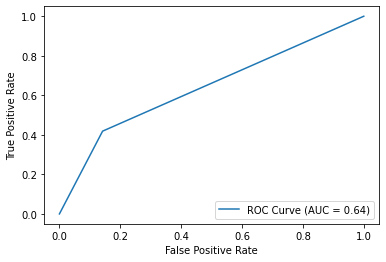

In [34]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_deepsea1)
roc_auc = roc_auc_score(y_test, pred_deepsea1)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [35]:
model_deepsea2 = XGBClassifier(
 reg_alpha = 0,
 reg_lambda = 10,
 eta = 0.1,
 n_estimators=100,
 objective= 'binary:logistic',
 seed=7)

train_model_deepsea2 = model_deepsea2.fit(X_train, y_train)
pred_deepsea2 = train_model_deepsea2.predict(X_test)
print("Accuracy_model_deepsea2: %.4f" % (accuracy_score(y_test, pred_deepsea2)))
print("F1_model_deepsea2: %.4f" % (f1_score(y_test, pred_deepsea2)))
print("MCC_model_deepsea2: %.4f" % (matthews_corrcoef(y_test, pred_deepsea2)))
print("ROC_AUC_model_deepsea2: %.4f" % (roc_auc_score(y_test, pred_deepsea2))) # don't know about call: y_score vs. pred

Accuracy_model_deepsea2: 0.7060
F1_model_deepsea2: 0.6980
MCC_model_deepsea2: 0.4173
ROC_AUC_model_deepsea2: 0.7080


In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_deepsea2).ravel()
print(tp, fp, fn, tn)

512 174 269 552


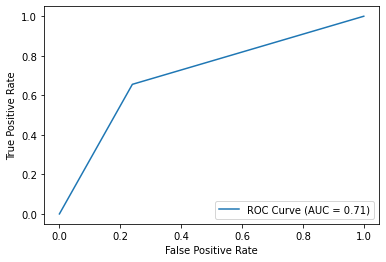

In [37]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_deepsea2)
roc_auc = roc_auc_score(y_test, pred_deepsea2)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [38]:
model_regbase = XGBClassifier(
    colsample_bylevel = 0.5,
    colsample_bytree = 0.8,
    gamma = 0.0,
    learning_rate = 0.1,
    max_depth = 9,
    min_child_weight = 1,
    n_estimators = 200,
    reg_alpha = 0.0,
    reg_lambda = 1,
    scale_pos_weight = 0.9956297179,
    subsample = 0.8)

train_model_regbase = model_regbase.fit(X_train, y_train)
pred_regbase = train_model_regbase.predict(X_test)
print("Accuracy_model_regbase: %.4f" % (accuracy_score(y_test, pred_regbase)))
print("F1_model_regbase: %.4f" % (f1_score(y_test, pred_regbase)))
print("MCC_model_regbase: %.4f" % (matthews_corrcoef(y_test, pred_regbase)))
print("ROC_AUC_model_regbase: %.4f" % (roc_auc_score(y_test, pred_regbase)))

Accuracy_model_regbase: 0.7160
F1_model_regbase: 0.7048
MCC_model_regbase: 0.4391
ROC_AUC_model_regbase: 0.7183


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_regbase).ravel()
print(tp, fp, fn, tn)

511 158 270 568


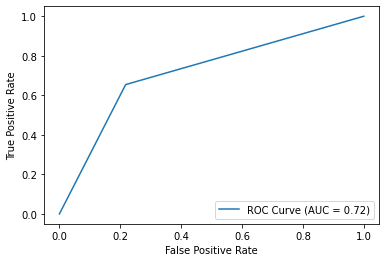

In [40]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_regbase)
roc_auc = roc_auc_score(y_test, pred_regbase)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [41]:
import xgboost as xgb

# should X, y be X_train, y_train
data_matrix = xgb.DMatrix(data=X, label=y)

params = {
    "colsample_bylevel": 0.5,
    "colsample_bytree": 0.8,
    "gamma": 0.0,
    "learning_rate": 0.1,
    "max_depth": 9,
    "min_child_weight": 1,
    "alpha": 0.0,
    "lambda": 1,
    "scale_pos_weight": 0.9956297179,
    "subsample": 0.8
}

xgb_cv = xgb.cv(dtrain=data_matrix, params=params, nfold=10,
                    num_boost_round=100, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=7)


In [42]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.887636,6.542677e-03,0.636559,0.030929
1,0.945505,3.678688e-03,0.671438,0.028406
2,0.966669,2.785969e-03,0.692915,0.028130
3,0.977981,3.158303e-03,0.705724,0.023695
4,0.985162,1.974180e-03,0.721214,0.019320
5,0.990005,1.538560e-03,0.730201,0.020933
6,0.992964,1.263232e-03,0.736976,0.022139
7,0.995140,9.557683e-04,0.739024,0.019687
8,0.996598,8.390620e-04,0.742499,0.019926
9,0.997712,6.487558e-04,0.744164,0.020191


In [43]:
model_regbase.set_params(n_estimators=xgb_cv.shape[0])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=58, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
train_model_regbase_cv = model_regbase.fit(X_train,y_train)
pred_regbase_cv = train_model_regbase.predict(X_test)
print("Accuracy_model_regbase: %.4f" % (accuracy_score(y_test, pred_regbase_cv)))
print("F1_model_regbase: %.4f" % (f1_score(y_test, pred_regbase_cv)))
print("MCC_model_regbase: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv)))
print("ROC_AUC_model_regbase: %.4f" % (roc_auc_score(y_test, pred_regbase_cv)))

Accuracy_model_regbase: 0.7007
F1_model_regbase: 0.6879
MCC_model_regbase: 0.4090
ROC_AUC_model_regbase: 0.7032


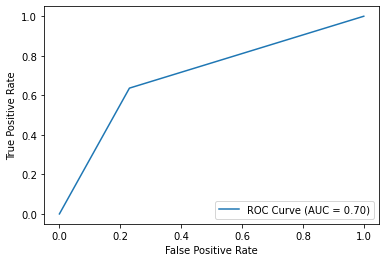

In [45]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred_regbase_cv)
roc_auc = roc_auc_score(y_test, pred_regbase_cv)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(name="ROC Curve")

In [27]:
param_test = {
 'max_depth': range(2,10,2),
 'min_child_weight': range(2,10,2)
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv3 = gsearch.fit(X_train, y_train)
pred_regbase_cv3 = train_model_regbase_cv3.predict(X_test)
print("Accuracy_model_cv3: %.4f" % (accuracy_score(y_test, pred_regbase_cv3)))  
print("F1_model_cv3: %.4f" % (f1_score(y_test, pred_regbase_cv3)))  
print("MCC_model_cv3: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv3)))  
print("ROC_AUC_model_cv3: %.4f" % (roc_auc_score(y_test, pred_regbase_cv3)))  

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuracy_model_cv3: 0.7067
F1_model_cv3: 0.6968
MCC_model_cv3: 0.4196
ROC_AUC_model_cv3: 0.7088


In [28]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'max_depth': 8, 'min_child_weight': 6}

In [32]:
param_test = {
 'max_depth': [7,8,9],
 'min_child_weight': [5,6,7]
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv4 = gsearch.fit(X_train, y_train)
pred_regbase_cv4 = train_model_regbase_cv4.predict(X_test)
print("Accuracy_model_cv4: %.4f" % (accuracy_score(y_test, pred_regbase_cv4)))  
print("F1_model_cv4: %.4f" % (f1_score(y_test, pred_regbase_cv4)))  
print("MCC_model_cv4: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv4)))  
print("ROC_AUC_model_cv4: %.4f" % (roc_auc_score(y_test, pred_regbase_cv4)))  

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Accuracy_model_cv4: 0.7067
F1_model_cv4: 0.6968
MCC_model_cv4: 0.4196
ROC_AUC_model_cv4: 0.7088


In [33]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'max_depth': 8, 'min_child_weight': 6}

In [34]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,7.317529,0.109919,0.108006,0.002042,7,5,"{'max_depth': 7, 'min_child_weight': 5}",0.764820,0.763528,0.768823,...,0.999817,0.999938,0.999956,0.999986,0.999974,0.999877,0.999935,0.999967,0.999935,0.000049
1,6.977573,0.089905,0.107684,0.002471,7,6,"{'max_depth': 7, 'min_child_weight': 6}",0.762011,0.774151,0.798818,...,0.999850,0.999771,0.999852,0.999592,0.999914,0.999824,0.999895,0.999870,0.999836,0.000092
2,6.691982,0.067502,0.108713,0.002777,7,7,"{'max_depth': 7, 'min_child_weight': 7}",0.764368,0.784192,0.794201,...,0.999723,0.999681,0.999677,0.999511,0.999531,0.999645,0.999561,0.999712,0.999634,0.000076
3,8.521992,0.069386,0.109992,0.001258,8,5,"{'max_depth': 8, 'min_child_weight': 5}",0.766725,0.781448,0.796913,...,0.999976,0.999996,0.999998,0.999996,0.999992,0.999997,0.999992,0.999987,0.999992,0.000006
4,8.020139,0.072559,0.109914,0.001320,8,6,"{'max_depth': 8, 'min_child_weight': 6}",0.769857,0.776508,0.790198,...,0.999991,0.999930,0.999976,0.999980,0.999922,0.999859,0.999974,0.999989,0.999960,0.000041
5,7.599952,0.084340,0.109643,0.001628,8,7,"{'max_depth': 8, 'min_child_weight': 7}",0.767338,0.766692,0.787098,...,0.999954,0.999918,0.999905,0.999904,0.999891,0.999864,0.999825,0.999911,0.999908,0.000041
6,9.342267,0.082182,0.110082,0.001426,9,5,"{'max_depth': 9, 'min_child_weight': 5}",0.768339,0.763561,0.805050,...,0.999999,1.000000,1.000000,1.000000,0.999999,0.999998,0.999980,1.000000,0.999997,0.000006
7,8.728108,0.065058,0.109551,0.001864,9,6,"{'max_depth': 9, 'min_child_weight': 6}",0.749742,0.780996,0.801175,...,0.999993,0.999997,0.999991,0.999989,0.999995,0.999988,0.999988,0.999972,0.999991,0.000007
8,8.052558,0.256197,0.108976,0.002548,9,7,"{'max_depth': 9, 'min_child_weight': 7}",0.737311,0.768436,0.792748,...,0.999934,0.999894,0.999994,0.999964,0.999987,0.999932,0.999974,0.999943,0.999948,0.000030


In [35]:
param_test = {
 'gamma': range(2,6),
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv5 = gsearch.fit(X_train, y_train)
pred_regbase_cv5 = train_model_regbase_cv5.predict(X_test)
print("Accuracy_model_cv5: %.4f" % (accuracy_score(y_test, pred_regbase_cv5)))  
print("F1_model_cv5: %.4f" % (f1_score(y_test, pred_regbase_cv5)))  
print("MCC_model_cv5: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv5)))  
print("ROC_AUC_model_cv5: %.4f" % (roc_auc_score(y_test, pred_regbase_cv5))) 

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Accuracy_model_cv5: 0.7060
F1_model_cv5: 0.6960
MCC_model_cv5: 0.4183
ROC_AUC_model_cv5: 0.7082


In [36]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'gamma': 2}

In [37]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,11.299287,0.103915,0.108810,0.001979,2,{'gamma': 2},0.750581,0.770341,0.790327,0.783288,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,9.391656,0.106856,0.109454,0.000875,3,{'gamma': 3},0.767500,0.765530,0.774571,0.811895,...,0.999996,0.999998,0.999998,0.999998,0.999996,0.999965,0.999985,0.999996,0.999993,0.000010
2,7.965583,0.044965,0.109127,0.001119,4,{'gamma': 4},0.767984,0.773893,0.782481,0.798302,...,0.999839,0.999832,0.999833,0.999713,0.999759,0.999559,0.999682,0.999704,0.999760,0.000095
3,6.937128,0.119489,0.108563,0.002900,5,{'gamma': 5},0.742703,0.772698,0.781415,0.804565,...,0.998467,0.998779,0.998583,0.998139,0.998893,0.998024,0.998573,0.998668,0.998484,0.000258


In [38]:
param_test = {
  'subsample': [i/10.0 for i in range(6,10)],
  'colsample_bytree': [i/10.0 for i in range(6,10)]
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv6 = gsearch.fit(X_train, y_train)
pred_regbase_cv6 = train_model_regbase_cv6.predict(X_test)
print("Accuracy_model_cv6: %.4f" % (accuracy_score(y_test, pred_regbase_cv6)))  
print("F1_model_cv6: %.4f" % (f1_score(y_test, pred_regbase_cv6)))  
print("MCC_model_cv6: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv6)))  
print("ROC_AUC_model_cv6: %.4f" % (roc_auc_score(y_test, pred_regbase_cv6))) 

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuracy_model_cv6: 0.6928
F1_model_cv6: 0.6791
MCC_model_cv6: 0.3931
ROC_AUC_model_cv6: 0.6952


In [39]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'colsample_bytree': 0.7, 'subsample': 0.9}

In [40]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,12.870290,0.064743,0.107645,0.001691,0.6,0.6,"{'colsample_bytree': 0.6, 'subsample': 0.6}",0.729917,0.752648,0.778025,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.198886e-07
1,13.644059,0.142718,0.109963,0.001750,0.6,0.7,"{'colsample_bytree': 0.6, 'subsample': 0.7}",0.760493,0.762786,0.761365,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,14.305547,0.203154,0.110142,0.002986,0.6,0.8,"{'colsample_bytree': 0.6, 'subsample': 0.8}",0.760849,0.777573,0.786904,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.510833e-17
3,15.045343,0.132846,0.110081,0.001459,0.6,0.9,"{'colsample_bytree': 0.6, 'subsample': 0.9}",0.749516,0.783320,0.802112,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
4,13.528798,0.086595,0.109980,0.001433,0.7,0.6,"{'colsample_bytree': 0.7, 'subsample': 0.6}",0.756813,0.768049,0.788842,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.598003e-07
5,14.306096,0.083921,0.110412,0.001614,0.7,0.7,"{'colsample_bytree': 0.7, 'subsample': 0.7}",0.746642,0.783708,0.781932,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
6,15.133360,0.075230,0.110572,0.001589,0.7,0.8,"{'colsample_bytree': 0.7, 'subsample': 0.8}",0.761171,0.779801,0.787518,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
7,15.855374,0.164584,0.111383,0.001847,0.7,0.9,"{'colsample_bytree': 0.7, 'subsample': 0.9}",0.769211,0.772569,0.789487,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
8,14.196083,0.120043,0.111334,0.001628,0.8,0.6,"{'colsample_bytree': 0.8, 'subsample': 0.6}",0.751744,0.754746,0.775249,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.198118e-07
9,14.901133,0.107213,0.110349,0.001402,0.8,0.7,"{'colsample_bytree': 0.8, 'subsample': 0.7}",0.766305,0.788164,0.778865,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00


In [41]:
param_test = {
  'reg_alpha':[1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1],
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv7 = gsearch.fit(X_train, y_train)
pred_regbase_cv7 = train_model_regbase_cv7.predict(X_test)
print("Accuracy_model_cv7: %.4f" % (accuracy_score(y_test, pred_regbase_cv7)))  
print("F1_model_cv7: %.4f" % (f1_score(y_test, pred_regbase_cv7)))  
print("MCC_model_cv7: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv7)))  
print("ROC_AUC_model_cv7: %.4f" % (roc_auc_score(y_test, pred_regbase_cv7))) 

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Accuracy_model_cv7: 0.7007
F1_model_cv7: 0.6879
MCC_model_cv7: 0.4090
ROC_AUC_model_cv7: 0.7032


In [42]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'reg_alpha': 0.0001}

In [43]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,15.908086,0.111151,0.109240,0.002466,0.00001,{'reg_alpha': 1e-05},0.778800,0.775249,0.803371,0.799432,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,15.852350,0.086518,0.108102,0.002118,0.0001,{'reg_alpha': 0.0001},0.773537,0.774829,0.803371,0.799432,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,15.845931,0.164574,0.109911,0.002126,0.001,{'reg_alpha': 0.001},0.759202,0.774958,0.791166,0.801078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,15.892008,0.137699,0.110582,0.001420,0.01,{'reg_alpha': 0.01},0.755521,0.757814,0.805566,0.817932,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,15.945283,0.151807,0.110591,0.001279,0.1,{'reg_alpha': 0.1},0.768985,0.770115,0.797850,0.807407,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,16.945546,0.106008,0.110004,0.002942,1,{'reg_alpha': 1},0.764045,0.762108,0.794653,0.802305,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [46]:
param_test = {
  'reg_alpha':[0.0, 1e-4, 0.5e-3, 1e-3, 8e-2, 6e-2],
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv8 = gsearch.fit(X_train, y_train)
pred_regbase_cv8 = train_model_regbase_cv8.predict(X_test)
print("Accuracy_model_cv8: %.4f" % (accuracy_score(y_test, pred_regbase_cv8)))  
print("F1_model_cv8: %.4f" % (f1_score(y_test, pred_regbase_cv8)))  
print("MCC_model_cv8: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv8)))  
print("ROC_AUC_model_cv8: %.4f" % (roc_auc_score(y_test, pred_regbase_cv8))) 

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Accuracy_model_cv8: 0.7007
F1_model_cv8: 0.6879
MCC_model_cv8: 0.4090
ROC_AUC_model_cv8: 0.7032


In [47]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'reg_alpha': 0.0001}

In [48]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,15.913134,0.112091,0.109109,0.001530,0.0,{'reg_alpha': 0.0},0.778800,0.775249,0.803371,0.799432,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,15.865764,0.111446,0.108125,0.001995,0.0001,{'reg_alpha': 0.0001},0.773537,0.774829,0.803371,0.799432,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,15.786991,0.061167,0.110622,0.001246,0.0005,{'reg_alpha': 0.0005},0.773602,0.774990,0.800077,0.794007,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,15.804666,0.113610,0.109325,0.001942,0.001,{'reg_alpha': 0.001},0.759202,0.774958,0.791166,0.801078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,15.858119,0.214653,0.110510,0.001676,0.08,{'reg_alpha': 0.08},0.763141,0.777250,0.788228,0.809441,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,15.916448,0.134692,0.108648,0.002001,0.06,{'reg_alpha': 0.06},0.765982,0.769082,0.808698,0.806438,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [49]:
param_test = {
  'learning_rate':[0.01, 0.05, 0.1, 0.15, 0.2],
}
    
gsearch = GridSearchCV(estimator=XGBClassifier(
                       colsample_bylevel = 0.5,
                       colsample_bytree = 0.8,
                       gamma = 0.0,
                       learning_rate = 0.1,
                       max_depth = 9,
                       min_child_weight = 1,
                       n_estimators = 58,
                       reg_alpha = 0.0,
                       reg_lambda = 1,
                       scale_pos_weight = 0.9956297179,
                       subsample = 0.8), 
                       param_grid=param_test, 
                       scoring='roc_auc',
                       n_jobs=4, 
                       verbose=4,
                       return_train_score=True,
                       cv=10,
                       refit=True)

train_model_regbase_cv9 = gsearch.fit(X_train, y_train)
pred_regbase_cv9 = train_model_regbase_cv9.predict(X_test)
print("Accuracy_model_cv9: %.4f" % (accuracy_score(y_test, pred_regbase_cv9)))  
print("F1_model_cv9: %.4f" % (f1_score(y_test, pred_regbase_cv9)))  
print("MCC_model_cv9: %.4f" % (matthews_corrcoef(y_test, pred_regbase_cv9)))  
print("ROC_AUC_model_cv9: %.4f" % (roc_auc_score(y_test, pred_regbase_cv9))) 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Accuracy_model_cv9: 0.7007
F1_model_cv9: 0.6879
MCC_model_cv9: 0.4090
ROC_AUC_model_cv9: 0.7032


In [50]:
gsearch.cv_results_['params'][gsearch.best_index_]

{'learning_rate': 0.1}

In [51]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,18.089930,0.160366,0.109746,0.002191,0.01,{'learning_rate': 0.01},0.757361,0.751227,0.777476,0.795428,...,0.999054,0.998403,0.998666,0.998627,0.998857,0.998938,0.999144,0.999203,0.998867,2.341021e-04
1,17.868010,0.176902,0.108366,0.001681,0.05,{'learning_rate': 0.05},0.757297,0.772020,0.776411,0.810151,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.198118e-07
2,15.827646,0.079828,0.109218,0.001907,0.1,{'learning_rate': 0.1},0.778800,0.775249,0.803371,0.799432,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,14.016324,0.115315,0.110471,0.001965,0.15,{'learning_rate': 0.15},0.750678,0.764206,0.792038,0.808956,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,12.448085,0.448279,0.108372,0.002135,0.2,{'learning_rate': 0.2},0.744188,0.755618,0.788616,0.789649,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [ ]:
# Save default model

In [15]:
from joblib import dump, load

best_estimator = train_model1
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_CAN_default.joblib")

['/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_CAN_default.joblib']

In [44]:
# Save best model

In [25]:
from joblib import dump, load

best_estimator = train_model_regbase
dump(best_estimator, path_prefix + "DNABERT_2/Output_Models/" + "model_xpg_boost_PRVCS_CAN_all.joblib")

['/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_CAN_all.joblib']

In [26]:
test_estimator = load('/expanse/lustre/projects/nji102/sgriesmer/DNABERT_2/Output_Models/model_xpg_boost_PRVCS_CAN.joblib')

In [27]:
test_pred = test_estimator.predict(X_test)

In [29]:
test_pred.sum()

670

In [27]:
# Load Rate_Patho dataset

In [30]:
RARPAT_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/RARPAT_0_102-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [32]:
RARPAT_abs_diff_plus_log_odds_scores_norm.shape

(102, 1380)

In [31]:
# Set model names to numbers

In [37]:
RARPAT_abs_diff_plus_log_odds_scores_norm = RARPAT_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [38]:
RARPAT_abs_diff_plus_log_odds_scores_norm

,0,1,2,3,4,5,6,7,8,9,...,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
0,-0.177281,3.297896,-0.245501,0.650651,5.995141,-0.249386,-0.306055,-0.413578,1.077594,-0.334877,...,-0.298899,-0.287583,-0.148622,-0.234587,-0.290536,-0.640381,-0.067265,-0.376702,-0.296578,-0.428227
1,-0.171037,-0.342376,-0.260220,0.278552,-0.522190,-0.242656,-0.314110,-0.439076,-0.423111,-0.283096,...,-0.416881,-0.295374,-0.593796,-0.209265,-0.034916,-0.381576,-0.552161,-0.366302,-0.277084,-0.488131
2,-0.177402,-0.587210,0.076961,-0.745354,-0.522509,-0.187210,-0.314593,-0.091367,-0.422259,-0.326698,...,-0.409615,0.252402,-0.544256,0.474081,0.388900,0.740392,-0.613222,-0.358885,1.625095,0.643726
3,-0.177683,-0.649530,-0.285416,-0.986173,-0.522082,-0.249346,-0.314775,-0.451759,-0.423253,-0.338585,...,-0.427851,-0.290868,-0.666745,-0.437182,-0.340548,-0.674366,-0.629239,-0.374523,-0.306995,-0.496105
4,-0.177163,-0.598919,-0.206958,0.028644,-0.522084,-0.249373,-0.313449,-0.450472,-0.358900,-0.338446,...,-0.231647,-0.267146,0.235424,0.391872,-0.244914,-0.462426,1.377628,-0.326423,-0.285082,-0.253488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.361295,1.372549,0.722690,0.795316,-0.036477,-0.213304,-0.282888,-0.390043,-0.139379,-0.092822,...,-0.119199,-0.270142,2.348187,-0.217078,-0.258073,0.370915,-0.441337,0.225760,-0.245379,-0.183012
98,0.396554,3.741383,0.231097,1.107621,0.273080,-0.137044,-0.280623,-0.395629,0.664168,-0.182926,...,-0.414705,1.403502,-0.463925,-0.032628,-0.341533,0.199887,-0.476639,-0.134947,-0.247760,-0.370365
99,1.654014,-0.516077,0.121185,1.025451,3.148635,0.027362,-0.314703,-0.314815,-0.419479,1.387056,...,-0.362443,-0.260349,0.456551,-0.170669,0.033321,2.598063,-0.007481,-0.366481,0.334043,0.345386
100,-0.176968,0.465574,-0.284714,-0.420894,-0.505216,-0.249398,2.897313,-0.244529,0.550565,-0.338358,...,-0.397440,-0.285465,-0.248693,-0.405329,-0.091101,-0.012827,-0.624372,-0.373649,-0.308980,-0.464652


In [41]:
RARPAT_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/Rare_Patho_SNV_dataset_XY-named.txt", sep='\t')

In [42]:
y = RARPAT_prvcs['label']

In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
97     1
98     1
99     1
100    0
101    1
Name: label, Length: 102, dtype: int64

In [44]:
RARPAT_pred = test_estimator.predict(RARPAT_abs_diff_plus_log_odds_scores_norm)

In [46]:
print("Accuracy_model_CAN: %.4f" % (accuracy_score(y, RARPAT_pred)))  
print("F1_model_CAN: %.4f" % (f1_score(y, RARPAT_pred)))  
print("MCC_model_CAN: %.4f" % (matthews_corrcoef(y, RARPAT_pred)))  
print("ROC_AUC_model_CAN: %.4f" % (roc_auc_score(y , RARPAT_pred)))

Accuracy_model_CAN: 0.4902
F1_model_CAN: 0.4468
MCC_model_CAN: -0.0225
ROC_AUC_model_CAN: 0.4886


Load ASD dataset

In [47]:
ASD_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/ASD_0_107-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [48]:
ASD_abs_diff_plus_log_odds_scores_norm = ASD_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [49]:
ASD_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/ASD_denovo_SNV_dataset_XY-named.txt", sep='\t')

In [50]:
y = ASD_prvcs['label']

In [51]:
ASD_pred = test_estimator.predict(ASD_abs_diff_plus_log_odds_scores_norm)

In [52]:
print("Accuracy_model_CAN: %.4f" % (accuracy_score(y, ASD_pred)))  
print("F1_model_CAN: %.4f" % (f1_score(y, ASD_pred)))  
print("MCC_model_CAN: %.4f" % (matthews_corrcoef(y, ASD_pred)))  
print("ROC_AUC_model_CAN: %.4f" % (roc_auc_score(y , ASD_pred)))

Accuracy_model_CAN: 0.5514
F1_model_CAN: 0.5385
MCC_model_CAN: 0.1118
ROC_AUC_model_CAN: 0.5556


Load GTEx dataset

In [53]:
GTEX_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/GTEX_0_796-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [54]:
GTEX_abs_diff_plus_log_odds_scores_norm = GTEX_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [55]:
GTEX_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/GTEx_eQTL_dataset_XY-named.txt", sep='\t')

In [56]:
y = GTEX_prvcs['label']

In [59]:
GTEX_pred = test_estimator.predict(GTEX_abs_diff_plus_log_odds_scores_norm)

In [60]:
print("Accuracy_model_CAN: %.4f" % (accuracy_score(y, GTEX_pred)))  
print("F1_model_CAN: %.4f" % (f1_score(y, GTEX_pred)))  
print("MCC_model_CAN: %.4f" % (matthews_corrcoef(y, GTEX_pred)))  
print("ROC_AUC_model_CAN: %.4f" % (roc_auc_score(y , GTEX_pred)))

Accuracy_model_CAN: 0.5101
F1_model_CAN: 0.5346
MCC_model_CAN: 0.0186
ROC_AUC_model_CAN: 0.5093


Load Somatic eQTL dataset

In [61]:
SOMEQTL_abs_diff_plus_log_odds_scores_norm = pd.read_csv(path_prefix + "DNABERT_2/output/SOMEQTL_0_7513-abs_diff_plus_log_odds_scores_norm_results_by_variant.csv", sep=',')

In [62]:
SOMEQTL_abs_diff_plus_log_odds_scores_norm = SOMEQTL_abs_diff_plus_log_odds_scores_norm.set_axis(col_lab, axis="columns")

In [63]:
SOMEQTL_prvcs = pd.read_csv(path_prefix + "DNABERT_2/Datasets/PRVCS/test_dataset/Somatic_eQTL_dataset_XY-named.txt", sep='\t')

In [64]:
y = SOMEQTL_prvcs['label']

In [65]:
SOMEQTL_pred = test_estimator.predict(SOMEQTL_abs_diff_plus_log_odds_scores_norm)

In [66]:
print("Accuracy_model_CAN: %.4f" % (accuracy_score(y, SOMEQTL_pred)))  
print("F1_model_CAN: %.4f" % (f1_score(y, SOMEQTL_pred)))  
print("MCC_model_CAN: %.4f" % (matthews_corrcoef(y, SOMEQTL_pred)))  
print("ROC_AUC_model_CAN: %.4f" % (roc_auc_score(y , SOMEQTL_pred)))

Accuracy_model_CAN: 0.3482
F1_model_CAN: 0.4002
MCC_model_CAN: -0.3083
ROC_AUC_model_CAN: 0.3482
